In [51]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #pythonhashseed 환경변수 설정
    np.random.seed(seed)

seed_everything(42)

import warnings
warnings.filterwarnings('ignore')

light_df = pd.read_csv('./data/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
#공백으로 구분된 네 개의 비공백 문자열을 찾음

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
#도시, 구, 동 열을 기준으로 데이터를 그룹화 함.
#sum()을 해주는 이유는 각 데이터의 도시, 구, 동에 대한 보안등의 개수 합
light_df.reset_index(inplace=True, drop=True)
#reset_index(): 데이터프레임의 인덱스 초기화.
#inplace = true는 변경사항을 light_df에 바로 적용(새로운 df가 아닌 기존 df) / drop = true 인덱스 새 열 추가 안함

child_area_df = pd.read_csv('./data/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')[['소재지지번주소']]
#중복된 값이 있으면 값이 겹칠 수 있으니 미리 중복 제거 
child_area_df['School Zone'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

parking_df = pd.read_csv('./data/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])
#parking_df값들을 one_hot encoding으로 진행

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [52]:
train_org = pd.read_csv("./data/train.csv")
test_org = pd.read_csv("./data/test.csv")

countrywide_org = pd.read_csv('./data/external_open/countrywide_accident.csv')
countrywide_org = countrywide_org[:100000]
display(train_org.head())
display(test_org.head())

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [53]:
train_df = train_org.copy()
test_df = test_org.copy()
countrywide_df = countrywide_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 
#날짜와 시간을 추출하기 위한 정규표현식
# \d{4}는 연도(4자리 숫자), \d{1,2}는 월과 일(1자리 또는 2자리 숫자), 그리고 \d{1,2}는 시간(1자리 또는 2자리 숫자)

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
                                                                            #pd.to_numeric함수는 숫자처럼 보이는 문자들을 숫자로 바꿔줌
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화
train_df = train_df.drop(columns=['사고일시']) # 정보 추출이 완료된 '사고일시' 컬럼은 제거

# 해당 과정을 test_x에 대해서도 반복해줍니다 
test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])

countrywide_df[['연', '월', '일', '시간']] = countrywide_org['사고일시'].str.extract(time_pattern)
countrywide_df[['연', '월', '일', '시간']] = countrywide_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
countrywide_df = countrywide_df.drop(columns=['사고일시'])

location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])

countrywide_df[['도시', '구', '동']] = countrywide_org['시군구'].str.extract(location_pattern)
countrywide_df = countrywide_df.drop(columns=['시군구'])


road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

countrywide_df[['도로형태1', '도로형태2']] = countrywide_org['도로형태'].str.extract(road_pattern)
countrywide_df = countrywide_df.drop(columns=['도로형태'])

In [54]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])


countrywide_df = pd.merge(countrywide_df, light_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, child_area_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, parking_df, how='left', on=['도시', '구', '동'])

print(train_df.shape, test_df.shape, countrywide_df.shape)

(39609, 34) (10963, 19) (100000, 34)


In [55]:
train_df.to_csv("./data/train_data_total.csv", encoding="cp949")
test_df.to_csv("./data/test_data_total.csv", encoding="cp949")

countrywide_df.to_csv("./data/countrywide_data_total.csv", encoding="cp949")

total_df = pd.concat([train_df,countrywide_df])
total_df.shape

print(train_df.columns)
print(test_df.columns)
print(countrywide_df.columns)

test_x = test_df.drop(columns=['ID']).copy() #column ID열 제거하고 붙여넣기
train_x = total_df[test_x.columns].copy() #test.columns 값만 넣기
train_y = total_df['ECLO'].copy()

# test_x = test_df.drop(columns=['ID']).copy() #column ID열 제거하고 붙여넣기
# train_x = train_df[test_x.columns].copy() #test.columns 값만 넣기
# train_y = train_df['ECLO'].copy()

print(train_x.shape, train_y.shape)
print(train_x.columns)
# countrywide_df.columns

Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '설치개수', 'School Zone',
       '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')
Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2', '설치개수', 'School Zone', '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')
Index(['ID', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO', '연',
       '월', '일', '시간', '도시', '구', '동', '도로형태1', '도로형태2', '설치개수', 'School Zone',
       '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')
(139609, 18) (139609,)
Index(['요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구

In [56]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer, make_column_transformer


# ohe = OneHotEncoder(sparse=False)
# train_gu_name = ohe.fit_transform(train_x[["구"]])
# train_gu_name = pd.DataFrame(train_gu_name, columns=[col for col in ohe.categories_[0]])
# train_x = pd.concat([train_x.drop(columns=['구']), train_gu_name], axis=1)

# test_gu_name = ohe.fit_transform(test_x[["구"]])
# test_gu_name = pd.DataFrame(test_gu_name, columns=[col for col in ohe.categories_[0]])
# test_x = pd.concat([test_x.drop(columns=['구']), test_gu_name], axis=1)

# display(train_x)

In [57]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index) #object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features) #object값 출력

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(train_x.head())
display(test_x.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.880205,4.974292,4.973987,4.000367,2019,1,1,0,4.726704,4.745051,4.246483,4.948663,4.852697,391.0,2.0,11.0,0.0,0.0
1,4.880205,5.123166,4.973987,4.000367,2019,1,1,0,4.726704,4.618441,4.738938,4.948663,4.852697,932.0,NaN,0.0,1.0,3.0
2,4.880205,4.974292,4.973987,4.000367,2019,1,1,1,4.726704,4.727300,4.839669,4.948663,4.852697,473.0,5.0,NaN,NaN,NaN
3,4.880205,4.974292,4.973987,5.250542,2019,1,1,2,4.726704,4.752105,4.208920,4.948663,4.852697,534.0,11.0,0.0,9.0,5.0
4,4.880205,4.974292,4.973987,5.250542,2019,1,1,4,4.726704,4.881812,4.549091,4.948663,4.852697,2057.0,NaN,0.0,1.0,0.0


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,5.254352,4.974292,4.973987,4.000367,2022,1,1,1,4.726704,4.727300,5.087871,5.092156,5.241587,700.0,5.0,NaN,NaN,NaN
1,5.254352,4.974292,4.973987,4.000367,2022,1,1,1,4.726704,4.727300,4.708819,4.948663,4.852697,NaN,10.0,0.0,0.0,2.0
2,5.254352,4.974292,4.973987,5.250542,2022,1,1,4,4.726704,4.727300,4.945578,5.092156,5.241587,NaN,1.0,NaN,NaN,NaN
3,5.254352,4.974292,4.973987,5.250542,2022,1,1,4,4.726704,4.727300,4.438172,4.948663,4.852697,NaN,7.0,0.0,2.0,1.0
4,5.254352,4.974292,4.973987,5.250542,2022,1,1,6,4.726704,4.618441,4.738938,5.092156,5.241587,932.0,NaN,0.0,1.0,3.0


In [89]:
train_x['설치개수'].median()

528.0

In [90]:
# train_x.fillna(0, inplace=True)
# test_x.fillna(0, inplace=True)

train_x['설치개수'] = train_x['설치개수'].fillna(train_x['설치개수'].mean())
train_x['School Zone'] = train_x['School Zone'].fillna(train_x['School Zone'].median())

# train_x['급지구분_1'] = train_x['급지구분_1'].fillna(train_x['급지구분_1'].mean())
# train_x['급지구분_2'] = train_x['급지구분_2'].fillna(train_x['급지구분_2'].mean())
# train_x['급지구분_3'] = train_x['급지구분_3'].fillna(train_x['급지구분_3'].mean())

train_x['급지구분_1'] = train_x['급지구분_1'].fillna(0)
train_x['급지구분_2'] = train_x['급지구분_2'].fillna(0)
train_x['급지구분_3'] = train_x['급지구분_3'].fillna(0)


test_x['설치개수'] = test_x['설치개수'].fillna(test_x['설치개수'].mean())
test_x['School Zone'] = test_x['School Zone'].fillna(test_x['School Zone'].median())

# test_x['급지구분_1'] = test_x['급지구분_1'].fillna(test_x['급지구분_1'].mean())
# test_x['급지구분_2'] = test_x['급지구분_2'].fillna(test_x['급지구분_2'].mean())
# test_x['급지구분_3'] = test_x['급지구분_3'].fillna(test_x['급지구분_3'].mean())

test_x['급지구분_1'] = test_x['급지구분_1'].fillna(0)
test_x['급지구분_2'] = test_x['급지구분_2'].fillna(0)
test_x['급지구분_3'] = test_x['급지구분_3'].fillna(0)

In [91]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer

def rmsle(y_true, y_pred):
    # y_true = tf.cast(y_true, tf.float32)
    # y_pred = tf.cast(y_pred, tf.float32)
    # squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    # return tf.sqrt(tf.reduce_mean(squared_error))
    
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    
    return tf.sqrt(tf.reduce_mean(squared_error))

def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=0.00001),
    tf.keras.callbacks.TerminateOnNaN()
] 

def create_model(l1_reg, l2_reg, learning_rate):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(24, kernel_regularizer=l1_regularizer(l1_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    x = tf.keras.layers.Dense(48, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    output_layer = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss=loss_fn,
                  metrics=[metric_fn])
    return model

best_params = {'batch_size': 128, 'l1_reg': 0.0001, 'l2_reg': 0.0001, 'learning_rate': 0.005}
optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])

In [92]:
from sklearn.model_selection import KFold

skf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_histories = []
test_preds = np.zeros(len(test_x))

for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    print(f'-------------------{ i }-------------------------')
    # print(train_index)
    x_train_fold, x_valid_fold = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train_fold, y_valid_fold = train_y.iloc[train_index], train_y.iloc[valid_index]
    # print(x_train_fold.shape, x_valid_fold.shape, y_train_fold.shape,y_valid_fold.shape)
    
    optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])
    history = optimized_model.fit(
                            x_train_fold.astype('float32'), y_train_fold.astype('float32'),
                            epochs=130, batch_size=best_params['batch_size'], verbose=1,
                            validation_data=(x_valid_fold.astype('float32'), y_valid_fold.astype('float32')),
                            callbacks=callbacks_list)
    
    fold_histories.append(history)
    
    test_preds +=  optimized_model.predict(test_x.astype('float32')).reshape(-1) / skf.n_splits

-------------------0-------------------------
Epoch 1/130


873/873 [==============================] - 4s 3ms/step - loss: 0.4671 - metric_fn: 0.4571 - val_loss: 0.4569 - val_metric_fn: 0.4487 - lr: 0.0050
Epoch 2/130
873/873 [==============================] - 2s 2ms/step - loss: 0.4547 - metric_fn: 0.4480 - val_loss: 0.4540 - val_metric_fn: 0.4484 - lr: 0.0050
Epoch 3/130
873/873 [==============================] - 2s 2ms/step - loss: 0.4520 - metric_fn: 0.4473 - val_loss: 0.4521 - val_metric_fn: 0.4479 - lr: 0.0050
Epoch 4/130
873/873 [==============================] - 2s 3ms/step - loss: 0.4498 - metric_fn: 0.4463 - val_loss: 0.4502 - val_metric_fn: 0.4469 - lr: 0.0050
Epoch 5/130
873/873 [==============================] - 2s 2ms/step - loss: 0.4488 - metric_fn: 0.4460 - val_loss: 0.4503 - val_metric_fn: 0.4477 - lr: 0.0050
Epoch 6/130
873/873 [==============================] - 2s 2ms/step - loss: 0.4480 - metric_fn: 0.4458 - val_loss: 0.4505 - val_metric_fn: 0.4484 - lr: 0.0050
Epoch 7/130
873/873 [==============================] - 2s 2ms/st

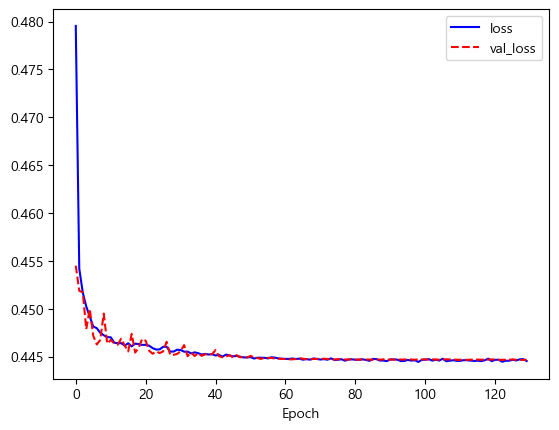

In [93]:
# train loss, val loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [96]:
sample_submission = pd.read_csv('data/sample_submission.csv')

sample_submission["ECLO"] = test_preds

sample_submission.to_csv("result/kf5_BN3_submission_modify_fill.csv", index=False)
sample_submission["ECLO"]

0        4.155546
1        3.741891
2        4.947080
3        4.185674
4        4.609177
           ...   
10958    5.463308
10959    4.397013
10960    4.904244
10961    4.665773
10962    4.483809
Name: ECLO, Length: 10963, dtype: float64

In [95]:
# !TODO
# scheduler

# train set 개수 늘리기 or 대구 데이터로만 